<a href="https://colab.research.google.com/github/danpele/Stat_fin_markets/blob/master/SFM_Sim_Pareto/SFM_Sim_pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

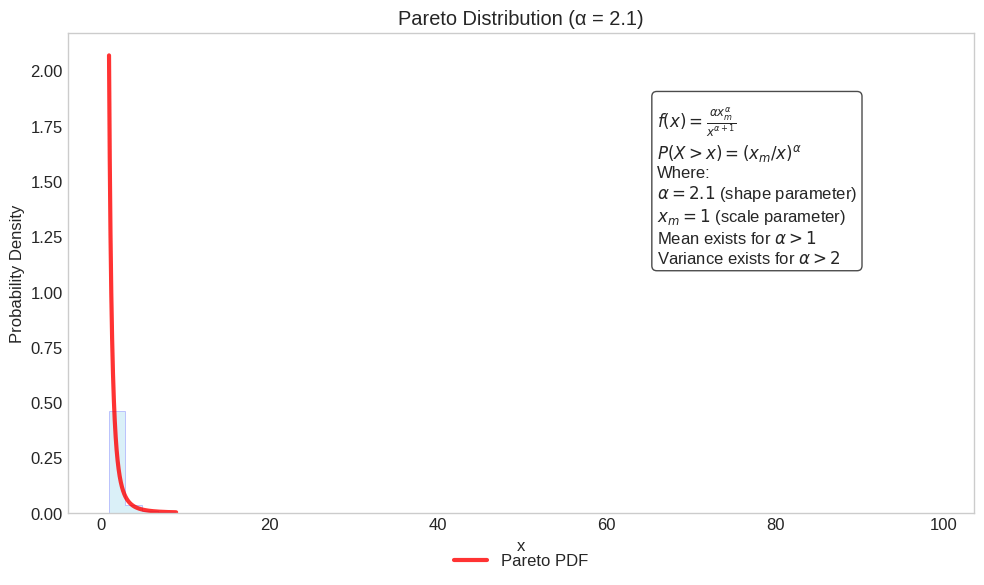

In [7]:
import numpy as np
from scipy.stats import pareto
import matplotlib.pyplot as plt

# Set plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')

# Pareto distribution parameter
alpha = 2.1

# Generate random samples from Pareto distribution
r = pareto.rvs(alpha, size=1000)

# Create figure with transparent background
fig, ax = plt.subplots(1, 1)
fig.patch.set_alpha(0)  # Make figure background transparent
ax.patch.set_alpha(0)   # Make axis background transparent

# Define x values for the PDF
x = np.linspace(pareto.ppf(0.01, alpha), pareto.ppf(0.99, alpha), 1000)

# Plot the Pareto PDF
ax.plot(x, pareto.pdf(x, alpha), 'r-', lw=3, alpha=0.8, label='Pareto PDF')

# Plot histogram of the random samples
ax.hist(r, density=True, bins=50, histtype='stepfilled', alpha=0.3, color='skyblue',
        edgecolor='blue', linewidth=0.5)

# Add title and labels
ax.set_title('Pareto Distribution (α = {})'.format(alpha))
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')

# Format the y-axis to use scientific notation for large values
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Add text explaining Pareto properties
textstr = '\n'.join((
    r'$f(x) = \frac{\alpha x_m^{\alpha}}{x^{\alpha+1}}$',
    r'$P(X>x)=(x_m/x)^\alpha$',
    r'Where:',
    r'$\alpha = {}$ (shape parameter)'.format(alpha),
    r'$x_m = 1$ (scale parameter)',
    r'Mean exists for $\alpha > 1$',
    r'Variance exists for $\alpha > 2$'
))

props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.65, 0.85, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Customize legend
ax.legend(bbox_to_anchor=(0.5, -0.1), loc='center', ncol=1, framealpha=0 )  # Legend outside the plot

# Add grid but make it subtle
ax.grid(False)

# Improve layout
plt.tight_layout()

# Save with transparent background
plt.savefig('pareto_distribution.png', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()